Group 33: Breitenecker Johannes, Dasovic Ivana, Thurner Lukas

# Exercise Nr 1: Classification

## Censius dataset

## Data preprocessing

### Import libraries

In [446]:
import time

import pandas as pd
import sklearn.model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint
import seaborn as sns
from sklearn import tree

from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

### Import dataset

In [447]:
# read in data
df_raw_data = pd.read_csv("adult.data",names = ["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"], na_values=[' ?'])

In [448]:
# Display for exploring data
df_raw_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Preprocessing

### Exploring data

In [449]:
# Exploring data
num_rows, num_cols = df_raw_data.shape
print(f'Number of columns is {num_cols} and number of row is {num_rows}')
print('Info of the database: ')
df_raw_data.info

Number of columns is 15 and number of row is 32561
Info of the database: 


<bound method DataFrame.info of        age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   

### Missing values

In [450]:
# checking missing values
# TODO it was tricky to find out that missing value is ' ?' instead of '?'
df_raw_data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [451]:
# delete observations with missing values
df_delete_missing_values = df_raw_data.dropna()
df_delete_missing_values.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### Preparing numeric data

In [452]:
# separate numerical data
df_numeric = df_delete_missing_values[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']].copy()

In [453]:
# standardization of numeric values
scaler = StandardScaler()
df_numeric_sc = pd.DataFrame(scaler.fit_transform(df_numeric))
df_numeric_sc.rename(mapper=dict(zip(df_numeric_sc.columns, df_numeric.columns)), axis=1, inplace=True)
df_numeric_sc.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,3.016200e+04,3.016200e+04,3.016200e+04,3.016200e+04,3.016200e+04,3.016200e+04
mean,1.535952e-16,1.684365e-17,-3.053058e-16,-2.720897e-17,7.703318e-17,-2.833973e-16
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.632189e+00,-1.666094e+00,-3.577051e+00,-1.474446e-01,-2.185860e-01,-3.333218e+00
25%,-7.946967e-01,-6.830644e-01,-4.397382e-01,-1.474446e-01,-2.185860e-01,-7.773411e-02
50%,-1.094756e-01,-1.076072e-01,-4.757405e-02,-1.474446e-01,-2.185860e-01,-7.773411e-02
75%,6.518811e-01,4.527602e-01,1.128918e+00,-1.474446e-01,-2.185860e-01,3.396356e-01
max,3.925715e+00,1.225647e+01,2.305411e+00,1.335458e+01,1.055581e+01,4.847229e+00


In [454]:
# normalize numeric data
normal = Normalizer()
df_numeric_nrm = pd.DataFrame(normal.fit_transform(df_numeric))
df_numeric_nrm.rename(mapper=dict(zip(df_numeric_nrm.columns, df_numeric)), axis=1, inplace=True)
df_numeric_nrm.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,0.000306,0.998779,0.000080,0.007164,0.000701,0.000326
std,0.000307,0.016927,0.000076,0.045646,0.004274,0.000327
min,0.000017,0.246804,0.000002,0.000000,0.000000,0.000004
25%,0.000136,1.000000,0.000040,0.000000,0.000000,0.000157
50%,0.000213,1.000000,0.000057,0.000000,0.000000,0.000227
75%,0.000347,1.000000,0.000087,0.000000,0.000000,0.000352
max,0.003980,1.000000,0.001008,0.969065,0.094350,0.004177


### Preparing categorical data

In [455]:
# create dataframe for categorical data
df_cat = df_delete_missing_values[['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']].copy()

In [456]:
# check how many work-classes exists. If there are more than two different values One-Hot-Encoding is used, otherwise Label-Encoding
df_cat['workclass'].unique()
# TODO there is a null - field which was not recognized from the further check - function !!!

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [457]:
df_cat['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [458]:
df_cat['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [459]:
df_cat['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [460]:
df_cat['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [461]:
df_cat['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [462]:
df_cat['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [463]:
df_cat['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [464]:
df_cat['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [465]:
# because income has also only two entries -> use LabelEncoder
lbencod_sex = LabelEncoder()
lbencod_income = LabelEncoder()

df_encode = pd.DataFrame()
df_encode['sex_encode'] = pd.DataFrame(lbencod_sex.fit_transform(df_cat['sex']))
df_encode['income_encode'] = pd.DataFrame(lbencod_income.fit_transform(df_cat['income']))

onehotenc_categories = []

onehotenc_workclass = OneHotEncoder(categories='auto', sparse_output=False)
census_onehot_workclass = pd.DataFrame(onehotenc_workclass.fit_transform(df_delete_missing_values[['workclass']]))
census_onehot_workclass.columns = onehotenc_workclass.get_feature_names_out()

onehotenc_education = OneHotEncoder(categories='auto', sparse_output=False)
census_onehot_education = pd.DataFrame(onehotenc_education.fit_transform(df_delete_missing_values[['education']]))
census_onehot_education.columns = onehotenc_education.get_feature_names_out()

onehotenc_marital_status = OneHotEncoder(categories='auto', sparse_output=False)
census_onehot_marital = pd.DataFrame(onehotenc_marital_status.fit_transform(df_delete_missing_values[['marital_status']]))
census_onehot_marital.columns = onehotenc_marital_status.get_feature_names_out()

onehotenc_occupation = OneHotEncoder(categories='auto', sparse_output=False)
census_onehot_occupation = pd.DataFrame(onehotenc_occupation.fit_transform(df_delete_missing_values[['occupation']]))
census_onehot_occupation.columns = onehotenc_occupation.get_feature_names_out()

onehotenc_relationship = OneHotEncoder(categories='auto', sparse_output=False)
census_onehot_relationship = pd.DataFrame(onehotenc_relationship.fit_transform(df_delete_missing_values[['relationship']]))
census_onehot_relationship.columns = onehotenc_relationship.get_feature_names_out()

onehotenc_race = OneHotEncoder(categories='auto', sparse_output=False)
census_onehot_race = pd.DataFrame(onehotenc_race.fit_transform(df_delete_missing_values[['race']]))
census_onehot_race.columns = onehotenc_race.get_feature_names_out()

onehotenc_native_country = OneHotEncoder(categories='auto', sparse_output=False)
census_onehot_country = pd.DataFrame(onehotenc_native_country.fit_transform(df_delete_missing_values[['native_country']]))
census_onehot_country.columns = onehotenc_native_country.get_feature_names_out()

# concat all one-hot categories
census_onehot = pd.concat([census_onehot_workclass,census_onehot_education ], axis=1)
census_onehot = pd.concat([census_onehot, census_onehot_marital], axis=1)
census_onehot = pd.concat([census_onehot, census_onehot_relationship], axis=1)
census_onehot = pd.concat([census_onehot, census_onehot_race], axis=1)
census_onehot = pd.concat([census_onehot, census_onehot_country], axis=1)

# concat one-hot with label encode dataframes
df_encode = pd.concat([df_encode, census_onehot], axis=1)

# concat categories with normalized numeric dataframes
df_encode = pd.concat([df_numeric_nrm, df_encode], axis=1)

df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 90 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   age                                         30162 non-null  float64
 1   fnlwgt                                      30162 non-null  float64
 2   education_num                               30162 non-null  float64
 3   capital_gain                                30162 non-null  float64
 4   capital_loss                                30162 non-null  float64
 5   hours_per_week                              30162 non-null  float64
 6   sex_encode                                  30162 non-null  int64  
 7   income_encode                               30162 non-null  int64  
 8   workclass_ Federal-gov                      30162 non-null  float64
 9   workclass_ Local-gov                        30162 non-null  float64
 10  workclass_

### init list for collecting best models

In [466]:
# list is needed at the evaluation section.
best_models = {}

### Splitting dataset into train and test data

In [467]:
# create array with columns indices to set x-features and y-features
# for this dataset we want to predict the sex and the income from the other features
ar_1 = list(range(0, 6))
ar_2 = list(range(8, len(df_encode.columns) - 1))
ar = ar_1 + ar_2
X = df_encode.iloc[:, ar]
y = df_encode.iloc[:, [6, 7]]

# split data into training and test set
X_training, X_test, y_training, y_test = train_test_split(X, y, train_size=0.70)

In [468]:
y_test.head()

,sex_encode,income_encode
1759,1,0
1559,1,0
1929,1,0
2515,1,0
18989,0,1


In [469]:
y_training.head()

,sex_encode,income_encode
6212,1,0
22432,0,1
3161,1,0
25634,1,0
24236,1,0


## Classifier Nr.: 1 decision tree

In [470]:
decision_tree = tree.DecisionTreeClassifier()
parameters = {'criterion': ['entropy', 'gini'],
              'splitter': ['best', 'random'],
              'max_depth': randint(1, 50),
              'min_samples_split': randint(2, 1000)}

### Finding the best decision tree

In [471]:
best_decision_tree = sklearn.model_selection.RandomizedSearchCV(estimator = decision_tree, param_distributions = parameters, cv = 5, n_iter = 50)
best_decision_tree.fit(X_training, y_training)

print(" Results from Random Search CV" )
print("\n The best estimator across searched params:\n", best_decision_tree.best_estimator_)
print("\n The best score across searched params:\n", best_decision_tree.best_score_)
print("\n The best parameters across searched params:\n", best_decision_tree.best_params_)
print("\n The best cross validation strategy:\n", best_decision_tree.cv)

 Results from Random Search CV

 The best estimator across searched params:
 DecisionTreeClassifier(max_depth=29, min_samples_split=241)

 The best score across searched params:
 0.6414997027960281

 The best parameters across searched params:
 {'criterion': 'gini', 'max_depth': 29, 'min_samples_split': 241, 'splitter': 'best'}

 The best cross validation strategy:
 5


### Train and predict

In [472]:
start_time = time.time()
best_dt_model = best_decision_tree.best_estimator_
best_dt_model = best_dt_model.fit(X_training,y_training)
best_dt_prediction = best_dt_model.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))
best_models['decision_tree'] = best_dt_model

--- runtime --- 0.18953967094421387


### Inverse transform y - features

In [473]:
y_best_dt_prediction_sex = lbencod_sex.inverse_transform(best_dt_prediction.transpose()[0])
y_test_sex = lbencod_sex.inverse_transform(y_test['sex_encode'])
y_best_dt_prediction_income = lbencod_income.inverse_transform(best_dt_prediction.transpose()[1])
y_test_income = lbencod_income.inverse_transform(y_test['income_encode'])

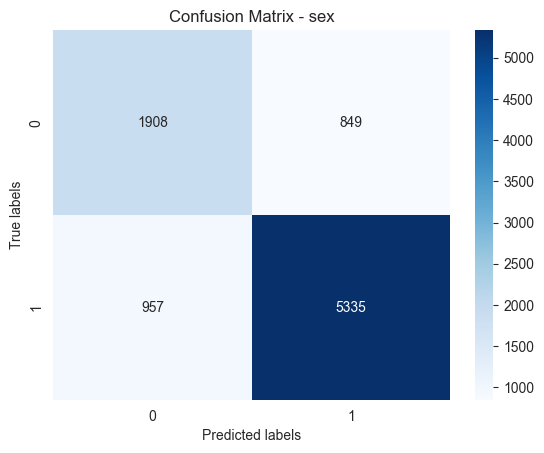

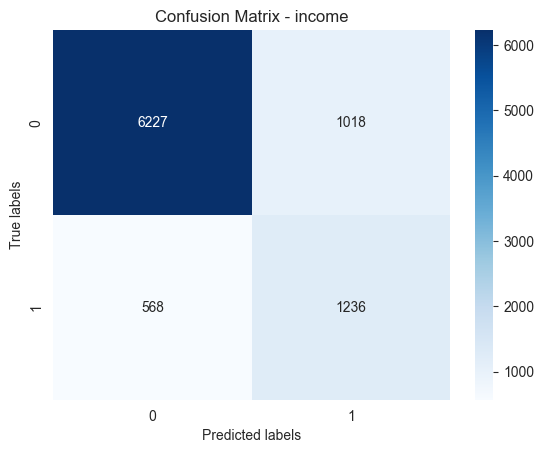

accuracy: 0.6380815559730357
precision: 0.8044253886350325
recall: 0.7787390376866556
F1: 0.7895093056308106
Cross validated scores: [0.66114137 0.6400663  0.6403031  0.63477025 0.631928  ]


In [491]:
best_dt_cm = metrics.confusion_matrix(y_best_dt_prediction_sex, y_test_sex)
sns.heatmap(best_dt_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - sex')
plt.show()


best_dt_cm = metrics.confusion_matrix(y_best_dt_prediction_income, y_test_income)
sns.heatmap(best_dt_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - income')
plt.show()


print("accuracy:",metrics.accuracy_score(y_test,best_dt_prediction))
print("precision:",metrics.precision_score(y_test,best_dt_prediction, average='weighted'))
print("recall:",metrics.recall_score(y_test,best_dt_prediction, average='weighted'))
print("F1:",metrics.f1_score(y_test,best_dt_prediction, average='weighted'))

cv_scores = cross_val_score(best_dt_model,X_training,y_training,cv=5)
print("Cross validated scores:",cv_scores)

[Text(0.720324098621421, 0.9814814814814815, 'x[36] <= 0.5\ngini = 0.407\nsamples = 21113\nvalue = [[6917, 14196]\n[15859, 5254]]'),
 Text(0.6014514846235419, 0.9444444444444444, 'x[41] <= 0.5\ngini = 0.339\nsamples = 12445\nvalue = [[6916, 5529]\n[11169, 1276]]'),
 Text(0.5445784729586426, 0.9074074074074074, 'x[40] <= 0.5\ngini = 0.314\nsamples = 11462\nvalue = [[5934, 5528]\n[10669, 793]]'),
 Text(0.47834040296924707, 0.8703703703703703, 'x[3] <= 0.041\ngini = 0.314\nsamples = 9209\nvalue = [[4199, 5010]\n[8558, 651]]'),
 Text(0.47155355249204667, 0.8333333333333334, 'x[35] <= 0.5\ngini = 0.302\nsamples = 9035\nvalue = [[4127, 4908]\n[8516, 519]]'),
 Text(0.42730646871686107, 0.7962962962962963, 'x[10] <= 0.5\ngini = 0.301\nsamples = 8714\nvalue = [[3860, 4854]\n[8217, 497]]'),
 Text(0.37274655355249203, 0.7592592592592593, 'x[25] <= 0.5\ngini = 0.299\nsamples = 8264\nvalue = [[3744, 4520]\n[7814, 450]]'),
 Text(0.3591728525980912, 0.7222222222222222, 'x[23] <= 0.5\ngini = 0.292\nsa

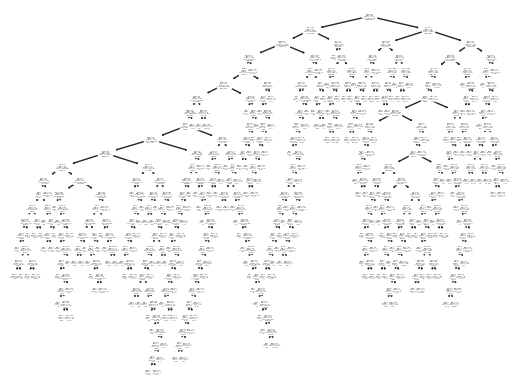

In [475]:
tree.plot_tree(best_dt_model)

## Classifier NR. 2: random forest

In [476]:
start_time = time.time()
random_forest = RandomForestClassifier(n_estimators=100,random_state=0)
random_forest.fit(X_training,y_training)
rf_prediction = random_forest.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

--- runtime --- 3.817491054534912


In [477]:
print("confusion matrix:",metrics.confusion_matrix(y_test['sex_encode'], rf_prediction.transpose()[0]))
print("accuracy:",metrics.accuracy_score(y_test, rf_prediction))
print("precision:",metrics.precision_score(y_test, rf_prediction, average='weighted'))
print("recall:",metrics.recall_score(y_test, rf_prediction, average='weighted'))
print("F1:",metrics.f1_score(y_test, rf_prediction, average='weighted'))

cv_scores = cross_val_score(random_forest,X_training,y_training,cv=5)
print("Cross validated scores:",cv_scores)

confusion matrix: [[1938  927]
 [ 934 5250]]
accuracy: 0.6320035363023538
precision: 0.8043657713833372
recall: 0.7743541123488978
F1: 0.7880726290845921
Cross validated scores: [0.64764386 0.63485674 0.64314468 0.63524396 0.63287541]


In [478]:
random_forest = RandomForestClassifier()
parameters = {'criterion': ['entropy', 'gini'],
                'max_depth': randint(1, 50),
                'min_samples_split':  randint(2, 1000),
                'max_features': ['sqrt', 'log2', None]}

### Finding best random forest

In [479]:
best_random_forest = sklearn.model_selection.RandomizedSearchCV(estimator=random_forest, param_distributions = parameters,cv = 2, n_iter = 50, n_jobs=-1)
best_random_forest.fit(X_training, y_training)

print(" Results from Random Search CV" )
print("\n The best estimator across searched params:\n", best_random_forest.best_estimator_)
print("\n The best score across searched params:\n", best_random_forest.best_score_)
print("\n The best parameters across searched params:\n", best_random_forest.best_params_)
print("\n The best cross validation strategy:\n", best_random_forest.cv)

 Results from Random Search CV

 The best estimator across searched params:
 RandomForestClassifier(max_depth=34, max_features=None, min_samples_split=79)

 The best score across searched params:
 0.654904362980472

 The best parameters across searched params:
 {'criterion': 'gini', 'max_depth': 34, 'max_features': None, 'min_samples_split': 79}

 The best cross validation strategy:
 2


In [480]:
start_time = time.time()
best_rf_model = best_random_forest.best_estimator_
best_rf_model = best_rf_model.fit(X_training,y_training)
best_rf_prediction = best_rf_model.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))
best_models['random_forest'] = best_rf_model

--- runtime --- 12.978194952011108


### inverse transform y - features

In [481]:
y_best_rf_prediction_sex = lbencod_sex.inverse_transform(best_dt_prediction.transpose()[0])
y_test_sex = lbencod_sex.inverse_transform(y_test['sex_encode'])
y_best_rf_prediction_income = lbencod_income.inverse_transform(best_dt_prediction.transpose()[1])
y_test_income = lbencod_income.inverse_transform(y_test['income_encode'])

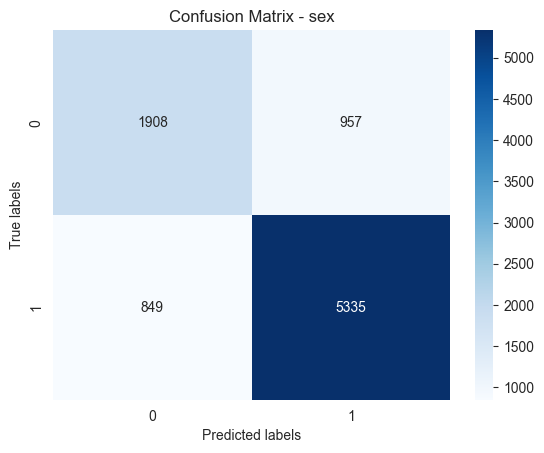

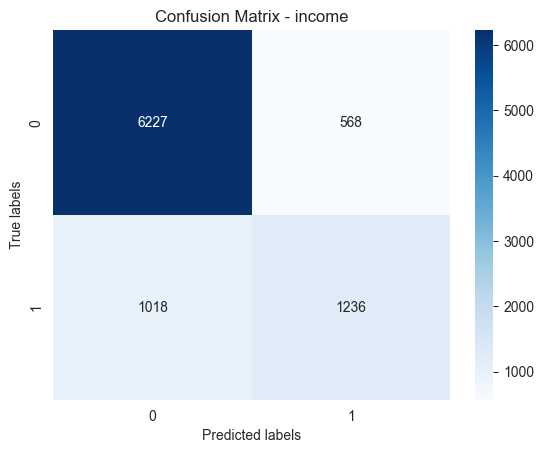

accuracy: 0.6605149740302796
precision: 0.8206722145787728
recall: 0.7886940033183218
F1: 0.8022136234134425
Cross validated scores: [0.66966611 0.65545821 0.65735259 0.65371862 0.64850782]


In [482]:
best_rf_cm = metrics.confusion_matrix(y_test_sex, y_best_rf_prediction_sex)
sns.heatmap(best_rf_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - sex')
plt.show()

best_rf_cm = metrics.confusion_matrix(y_test_income, y_best_rf_prediction_income)
sns.heatmap(best_rf_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - income')
plt.show()

print("accuracy:",metrics.accuracy_score(y_test,best_rf_prediction))
print("precision:",metrics.precision_score(y_test,best_rf_prediction, average='weighted'))
print("recall:",metrics.recall_score(y_test,best_rf_prediction, average='weighted'))
print("F1:",metrics.f1_score(y_test,best_rf_prediction, average='weighted'))

cv_scores = cross_val_score(best_rf_model,X_training,y_training,cv=5)
print("Cross validated scores:",cv_scores)

## Classifier Nr. 3 : KNN

In [483]:

# using the kNN classifier
knn = KNeighborsClassifier()
parameters = {'n_neighbors': randint(1, 50),
              'weights': ['uniform', 'distance'],
              'algorithm': ['brute']}


### Finding the best KNN

In [484]:
best_KNN = sklearn.model_selection.RandomizedSearchCV(estimator=knn, param_distributions=parameters, n_iter=50, n_jobs=5)
best_KNN.fit(X_training, y_training)

print(" Results from Random Search CV" )
print("\n The best estimator across searched params:\n", best_KNN.best_estimator_)
print("\n The best score across searched params:\n", best_KNN.best_score_)
print("\n The best parameters across searched params:\n", best_KNN.best_params_)
print("\n The best cross validation strategy:\n", best_KNN.cv)

 Results from Random Search CV

 The best estimator across searched params:
 KNeighborsClassifier(algorithm='brute', n_neighbors=42)

 The best score across searched params:
 0.6365744177096102

 The best parameters across searched params:
 {'algorithm': 'brute', 'n_neighbors': 42, 'weights': 'uniform'}

 The best cross validation strategy:
 None


### Training the model

In [485]:
start_time = time.time()
best_knn_model = best_KNN.best_estimator_
best_knn_model = best_knn_model.fit(X_training, y_training)
best_knn_prediction = best_knn_model.predict(X_test)
print('--- runtime ---', (time.time() - start_time))
best_models['knn'] = best_knn_model


--- runtime --- 0.951179027557373


### ### inverse transform y - features

In [486]:
y_best_knn_prediction_sex = lbencod_sex.inverse_transform(best_knn_prediction.transpose()[0])
y_test_sex = lbencod_sex.inverse_transform(y_test['sex_encode'])
y_best_knn_prediction_income = lbencod_income.inverse_transform(best_knn_prediction.transpose()[1])
y_test_income = lbencod_income.inverse_transform(y_test['income_encode'])

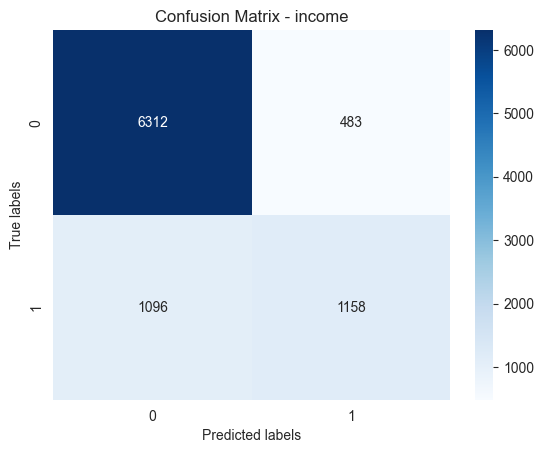

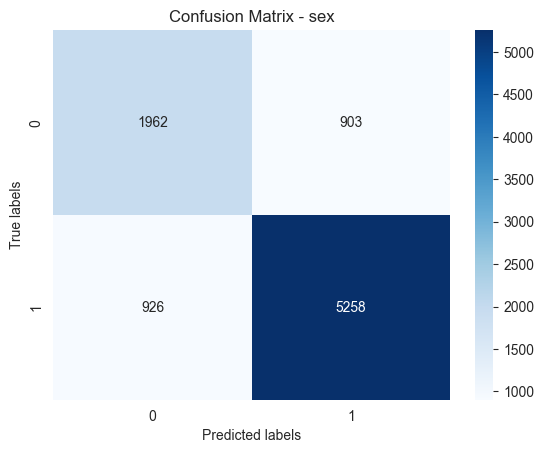

accuracy: 0.6391866504586142
precision: 0.8139610093099829
recall: 0.760369755866319
F1: 0.7831291407420432
Cross validated scores: [0.64551267 0.63177836 0.63675112 0.63571767 0.63311227]


In [487]:
best_knn_cm = metrics.confusion_matrix(y_test_income, y_best_knn_prediction_income)
sns.heatmap(best_knn_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - income')
plt.show()

best_knn_cm = metrics.confusion_matrix(y_test_sex, y_best_knn_prediction_sex)
sns.heatmap(best_knn_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - sex')
plt.show()

print("accuracy:",metrics.accuracy_score(y_test,best_knn_prediction))
print("precision:",metrics.precision_score(y_test,best_knn_prediction, average='weighted'))
print("recall:",metrics.recall_score(y_test,best_knn_prediction, average='weighted'))
print("F1:",metrics.f1_score(y_test,best_knn_prediction, average='weighted'))

cv_scores = cross_val_score(best_knn_model,X_training,y_training,cv=5)
print("Cross validated scores:",cv_scores)


## Evaluation

In [488]:
def eval_function(y_test, best_prediction):
    print("accuracy:",metrics.accuracy_score(y_test,best_prediction))
    print("precision:",metrics.precision_score(y_test,best_prediction, average='weighted'))
    print("recall:",metrics.recall_score(y_test,best_prediction, average='weighted'))
    print("F1:",metrics.f1_score(y_test,best_prediction, average='weighted'))


In [489]:
best_prediction_dict = {}
for name, best_model in best_models.items():
    best_prediction_dict[name] = best_model.predict(X_test)

In [490]:
for name, best_prediction in best_prediction_dict.items():
    print(f'\t {name} ')
    eval_function(y_test, best_prediction)
    print('\n')

	 decision_tree 
accuracy: 0.6380815559730357
precision: 0.8044253886350325
recall: 0.7787390376866556
F1: 0.7895093056308106


	 random_forest 
accuracy: 0.6605149740302796
precision: 0.8206722145787728
recall: 0.7886940033183218
F1: 0.8022136234134425


	 knn 
accuracy: 0.6391866504586142
precision: 0.8139610093099829
recall: 0.760369755866319
F1: 0.7831291407420432


